In [1]:
import os
import sys
from collections import OrderedDict
sys.path.append("../..")
import spatialpy
spatialpy.__file__
import matplotlib.pyplot as plt
import numpy
%load_ext autoreload
%autoreload 2

In [2]:
class Diffusion_debug_test(spatialpy.Model):

    def __init__(self, model_name="diffusion_debug_test"):
        spatialpy.Model.__init__(self, model_name)

        D_const = 0.005

        A = spatialpy.Species(name="A", diffusion_coefficient=D_const)
        B = spatialpy.Species(name="B", diffusion_coefficient=D_const)
        self.add_species([A, B])

        self.domain = spatialpy.Domain.create_2D_domain(
            xlim=[-1, 1], ylim=[-1, 1], nx=50, ny=50, type_id=1, 
            mass=1.0, nu=1.0, fixed=True,  rho0=1.0, c0=1.0, P0=1.0
        )

        self.add_initial_condition(spatialpy.PlaceInitialCondition(A, 10000, [0,0,0]))

        self.timespan(numpy.linspace(0, 5, 11), timestep_size=0.1)

In [3]:
model = Diffusion_debug_test()

In [4]:
from spatialpy import Solver
import filecmp
sol = Solver(model, debug_level=0)
sol.compile()
result = sol.run()

In [5]:
%time result2 = sol.run()

CPU times: user 511 µs, sys: 3.37 ms, total: 3.88 ms
Wall time: 1.48 s


In [6]:
filecmp.cmpfiles.__defaults__ = (False,)
dircmp = filecmp.dircmp(result.result_dir, result2.result_dir)
print(dircmp.report_full_closure())
print(dircmp.diff_files)
print(dircmp.left_only)
print(dircmp.right_only)
print(result == result2)

diff /var/folders/z4/bqpnd_kx7xg3s3c9jtz0pnfh0000gn/T/spatialpy_result_viu_srf2 /var/folders/z4/bqpnd_kx7xg3s3c9jtz0pnfh0000gn/T/spatialpy_result_g98849uk
Identical files : ['output0.vtk', 'output0_boundingBox.vtk']
Differing files : ['output1.vtk', 'output10.vtk', 'output11.vtk', 'output2.vtk', 'output3.vtk', 'output4.vtk', 'output5.vtk', 'output6.vtk', 'output7.vtk', 'output8.vtk', 'output9.vtk']
None
['output1.vtk', 'output10.vtk', 'output11.vtk', 'output2.vtk', 'output3.vtk', 'output4.vtk', 'output5.vtk', 'output6.vtk', 'output7.vtk', 'output8.vtk', 'output9.vtk']
[]
[]
False


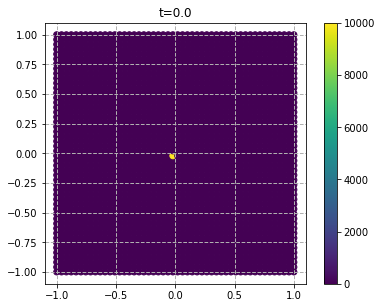

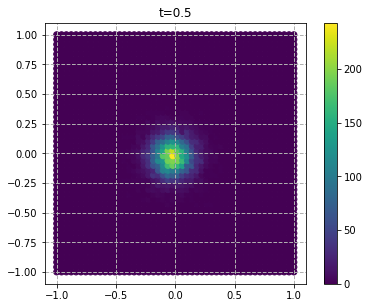

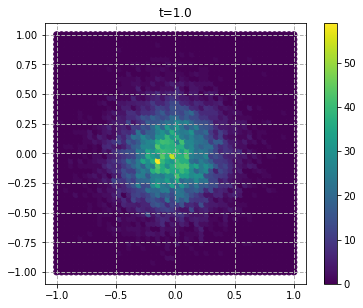

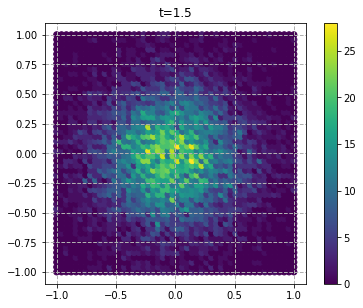

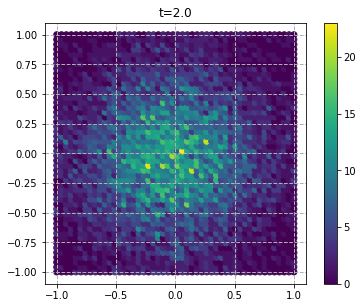

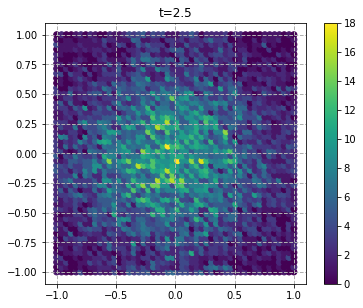

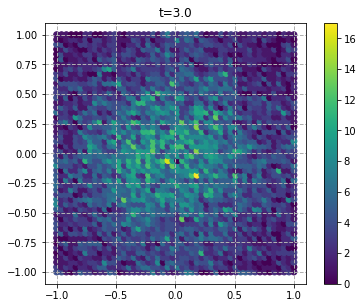

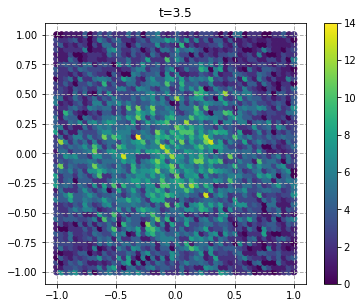

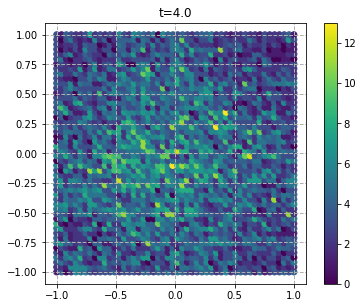

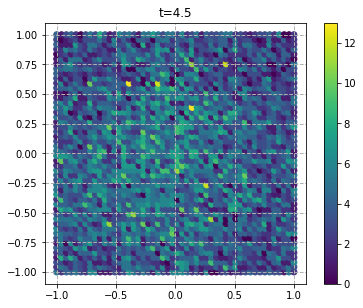

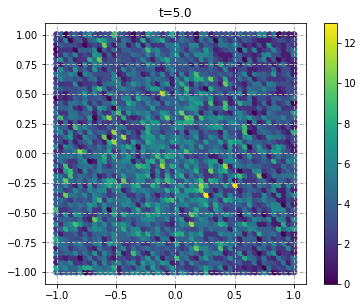

In [7]:
for i, t in enumerate(result.get_timespan()):
    result.plot_species("A", i, use_matplotlib=True)
    plt.title(f"t={t}")

In [8]:
def binit(x, y, y2=None):
    bins = sorted(list(set(x)))
    bin_values = numpy.zeros(50)
    if y2 is not None:
        y = numpy.sqrt(y**2+y2**2)
    for i, v in enumerate(y):
        for j, b in enumerate(bins):
            if x[i] == b:
                bin_values[j] += v
    return bins, bin_values

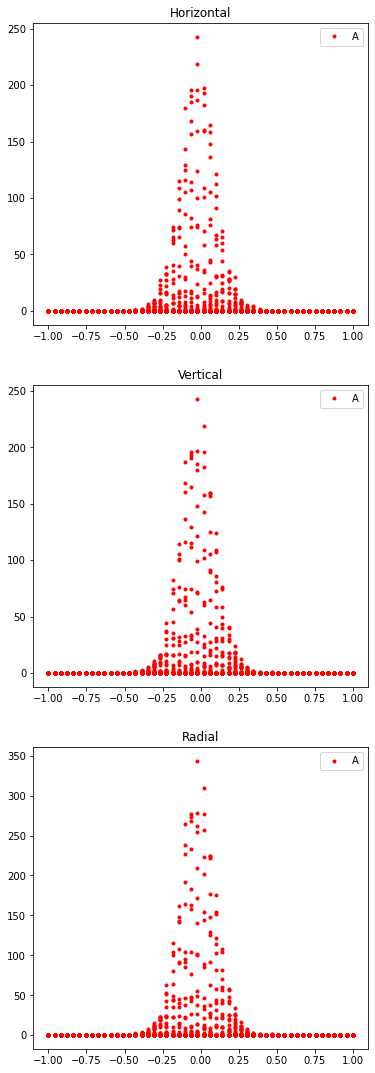

In [9]:
hx_vals = model.domain.coordinates()[:, 0]
hA_vals = result.get_species("A", timepoints=1, concentration=False)
vx_vals = model.domain.coordinates()[:, 1]
vA_vals = result.get_species("A", timepoints=1, concentration=False)

plt.figure(figsize=(6, 6))
plt.subplots_adjust(top=2.5)
plt.subplot(3, 1, 1)
plt.title('Horizontal')

plt.plot(hx_vals, hA_vals, '.r')
plt.legend(['A'], loc='best')

plt.subplot(3 ,1 ,2)
plt.title('Vertical')

plt.plot(vx_vals, vA_vals, '.r')
plt.legend(['A'], loc='best')

plt.subplot(3, 1, 3)
plt.title('Radial')

plt.plot(vx_vals, numpy.sqrt(vA_vals**2 + hA_vals**2), '.r')
plt.legend(['A'] ,loc='best')

In [10]:
dist_and_count = dict(zip(hx_vals, hA_vals))

In [11]:
hbins, hbin_values = binit(hx_vals, hA_vals)
vbins, vbin_values = binit(vx_vals, vA_vals)
rbins, rbin_values = binit(hx_vals, hA_vals, vA_vals)

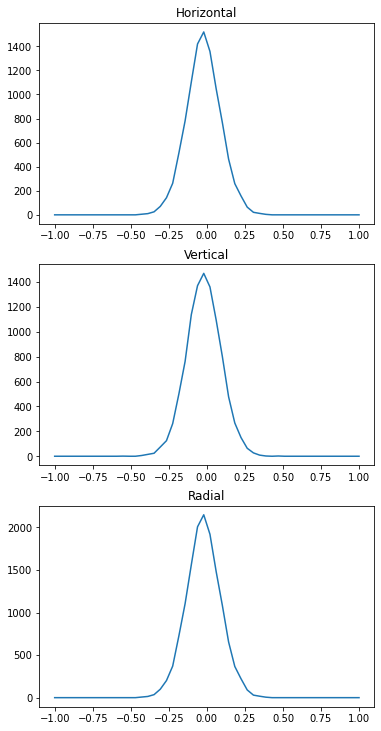

In [12]:
plt.subplot(3, 1, 1)
plt.title('Horizontal')
plt.plot(hbins, hbin_values)
plt.subplot(3, 1, 2)
plt.title('Vertical')
plt.plot(vbins, vbin_values)
plt.subplots_adjust(top=2.5)
plt.subplot(3, 1, 3)
plt.title('Radial')
plt.plot(rbins, rbin_values)

In [15]:
def countit(x, y, y2=None):
    counts = []
    if y2 is not None:
        y = numpy.sqrt(y**2 + y2**2)
    for i in range(len(x)):
        j = 0
        while j < y[i]:
            counts.append(hx_vals[i])
            j += 1
    return counts

(array([  10.,    0.,    0.,    0.,   18.,    0.,    0.,    0.,    0.,
           0.,   41.,    0.,    0.,    0.,    0.,  104.,    0.,    0.,
           0.,  208.,    0.,    0.,    0.,    0.,    0.,  381.,    0.,
           0.,    0.,  733.,    0.,    0.,    0.,    0., 1114.,    0.,
           0.,    0.,    0., 1572.,    0.,    0.,    0.,    0., 2017.,
           0.,    0.,    0.,    0.,    0., 2157.,    0.,    0.,    0.,
           0., 1929.,    0.,    0.,    0., 1490.,    0.,    0.,    0.,
           0., 1091.,    0.,    0.,    0.,    0.,  663.,    0.,    0.,
           0.,    0.,    0.,  374.,    0.,    0.,    0.,  230.,    0.,
           0.,    0.,    0.,   99.,    0.,    0.,    0.,    0.,   36.,
           0.,    0.,    0.,    0.,   21.,    0.,    0.,    0.,    0.,
           7.]),
 array([-0.42857143, -0.42040816, -0.4122449 , -0.40408163, -0.39591837,
        -0.3877551 , -0.37959184, -0.37142857, -0.36326531, -0.35510204,
        -0.34693878, -0.33877551, -0.33061224, -0.322448

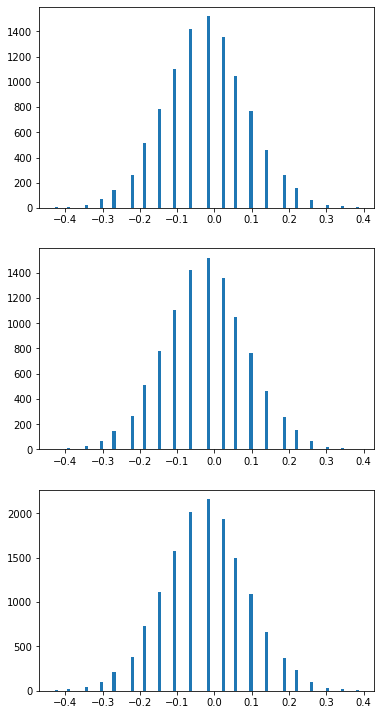

In [16]:
hcounts = countit(hx_vals, hA_vals)
vcounts = countit(vx_vals, vA_vals)
rcounts = countit(hx_vals, hA_vals, vA_vals)

plt.subplots_adjust(top=2.5)
plt.subplot(3, 1, 1)
plt.hist(hcounts, bins=100)
plt.subplot(3, 1, 2)
plt.hist(vcounts, bins=100)
plt.subplot(3, 1, 3)
plt.hist(rcounts, bins=100)